# Nonnegative matrix factorization

## Introduction

We are given a matrix $A \in \mathbf{\mbox{R}}^{m \times n}$ and are interested in solving the problem:
    \begin{array}{ll}
    \mbox{minimize}   & \| A - YX \|_F \\
    \mbox{subject to} & Y \succeq 0 \\
                      & X \succeq 0,
    \end{array}
where $Y \in \mathbf{\mbox{R}}^{m \times k}$ and $X \in \mathbf{\mbox{R}}^{k \times n}$.

This example generates a random matrix $A$ and obtains an
*approximate* solution to the above problem by first generating
a random initial guess for $Y$ and then alternatively minimizing
over $X$ and $Y$ for a fixed number of iterations.

## Generate problem data

In [8]:
import cvxpy as cvx
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Ensure repeatably random problem data.
np.random.seed(0)

# Generate random data matrix A.
m = 10
n = 10
k = 5
A = np.random.rand(m, k).dot(np.random.rand(k, n))

# Initialize Y randomly.
Y_init = np.random.rand(m, k)

## Perform alternating minimization

In [9]:
# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init 

# Perform alternating minimization.
MAX_ITERS = 30
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cvx.Variable(k, n)
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cvx.Variable(m, k)
        constraint = [Y >= 0]
    
    # Solve the problem.
    obj = cvx.Minimize(cvx.norm(A - Y*X, 'fro'))
    prob = cvx.Problem(obj, constraint)
    prob.solve(solver=cvx.SCS)

    if prob.status != cvx.OPTIMAL:
        raise Exception("Solver did not converge!")
    
    print 'Iteration {}, residual norm {}'.format(iter_num, prob.value)
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value

Iteration 1, residual norm 2.76615172334
Iteration 2, residual norm 0.584126092866
Iteration 3, residual norm 0.362275362385
Iteration 4, residual norm 0.199853152102
Iteration 5, residual norm 0.131340055061
Iteration 6, residual norm 0.096534299316
Iteration 7, residual norm 0.0703550624183
Iteration 8, residual norm 0.0583717900132
Iteration 9, residual norm 0.0453975715825
Iteration 10, residual norm 0.0397495934963
Iteration 11, residual norm 0.0315092584278
Iteration 12, residual norm 0.0297547927986
Iteration 13, residual norm 0.0242697293191
Iteration 14, residual norm 0.0241704337084
Iteration 15, residual norm 0.0189015234558
Iteration 16, residual norm 0.0174695529597
Iteration 17, residual norm 0.0149135071986
Iteration 18, residual norm 0.0141525938821
Iteration 19, residual norm 0.012332959948
Iteration 20, residual norm 0.0104855815521
Iteration 21, residual norm 0.00962218574123
Iteration 22, residual norm 0.00793369798175
Iteration 23, residual norm 0.00646645946517
It

## Output results

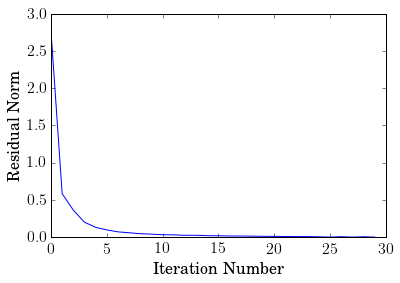

Original matrix:
[[ 1.323426    1.11061189  1.69137835  1.20020115  1.13216889  0.5980743
   1.64965406  0.340611    1.69871738  0.78278448]
 [ 1.73721109  1.40464204  1.90898877  1.60774132  1.53717253  0.62647405
   1.76242265  0.41151492  1.8048194   1.20313124]
 [ 1.4071438   1.10269406  1.75323063  1.18928983  1.23428169  0.60364688
   1.63792853  0.40855006  1.57257432  1.17227344]
 [ 1.3905141   1.33367163  1.07723947  1.67735654  1.33039096  0.42003169
   1.22641711  0.21470465  1.47350799  0.84931787]
 [ 1.42153652  1.13598552  2.00816457  1.11463462  1.17914429  0.69942578
   1.90353699  0.45664487  1.81023916  1.09668578]
 [ 1.60813803  1.23214532  1.73741086  1.3148874   1.27589039  0.40755835
   1.31904948  0.3469129   1.34256526  0.76924618]
 [ 0.90607895  0.6632877   1.25412229  0.81696721  0.87218892  0.50032884
   1.245879    0.25079329  1.25017792  0.72155621]
 [ 1.5691922   1.47359672  1.76518996  1.66268312  1.43746574  0.72486628
   1.97409333  0.39239642  2.092348

In [10]:
#
# Plot residuals.
#



# Set plot properties.
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

#
# Print results.
#
print 'Original matrix:'
print A
print 'Left factor Y:'
print Y
print 'Right factor X:'
print X
print 'Residual A - Y * X:'
print A - Y * X
print 'Residual after {} iterations: {}'.format(iter_num, prob.value)
